In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

# For a given dataset predict number of bikes getting shared based on temperature of the day

In [2]:
data = pd.read_csv('/home/admin1/machine_learning/week9/bike_sharing.csv')
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [4]:
data[['temp','cnt']].corr()

,temp,cnt
temp,1.000000,0.404772
cnt,0.404772,1.000000


In [5]:
x = data['temp'].values.reshape(-1,1)
y = data['cnt'].values.reshape(-1,1)

In [6]:
def split(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x , y, test_size = 0.2, random_state = 0)
    return x_train, x_test, y_train, y_test

In [7]:
def predictions(x_train,y_train):
    reg = LinearRegression()
    reg.fit(x_train, y_train)
    y_pred_train = reg.predict(x_train)
    pickle_out = open("simple_linear_parameters.pickle","wb")
    pickle.dump(y_pred_train, pickle_out)
    pickle.dump(reg, pickle_out)
    pickle_out.close()

In [8]:
def check_predictions(x_test):
    pickle_in = open("simple_linear_parameters.pickle","rb")
    y_pred_train = pickle.load(pickle_in)
    model = pickle.load(pickle_in)
    y_pred_test = model.predict(x_test)
    return y_pred_train, y_pred_test,

In [9]:
x_train, x_test, y_train, y_test = split(x,y)
predictions(x_train,y_train)
y_pred_train, y_pred_test = check_predictions(x_test)

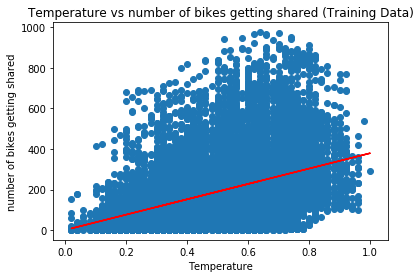

In [10]:
plt.scatter(x_train, y_train)
plt.plot(x_train, y_pred_train,'r')
plt.title('Temperature vs number of bikes getting shared (Training Data)')
plt.xlabel('Temperature')
plt.ylabel('number of bikes getting shared')
plt.show()

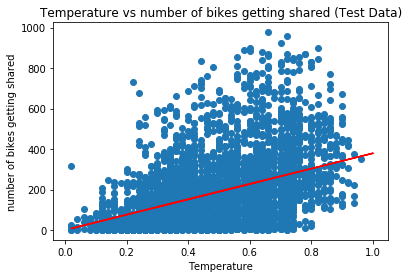

In [11]:
plt.scatter(x_test, y_test)
plt.plot(x_train, y_pred_train,'r')
plt.title('Temperature vs number of bikes getting shared (Test Data)')
plt.xlabel('Temperature')
plt.ylabel('number of bikes getting shared')
plt.show()

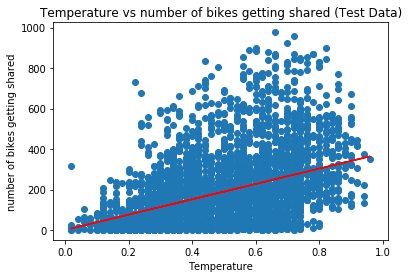

In [12]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred_test,'r')
plt.title('Temperature vs number of bikes getting shared (Test Data)')
plt.xlabel('Temperature')
plt.ylabel('number of bikes getting shared')
plt.show()

In [13]:
import numpy as np
mse = metrics.mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
rmse

166.29737835436157

In [14]:
data.shape

(17379, 17)

# Build a machine learning model to predict salary based on experience for a given dataset

In [15]:
dataset = pd.read_csv('/home/admin1/machine_learning/week9/Salary_Data.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [16]:
x1 = dataset.iloc[:, 0:-1].values
y1 = dataset.iloc[:, -1:].values

In [17]:
x_train, x_test, y_train, y_test = split(x1,y1)
predictions(x_train,y_train)
y_pred_train, y_pred_test = check_predictions(x_test)

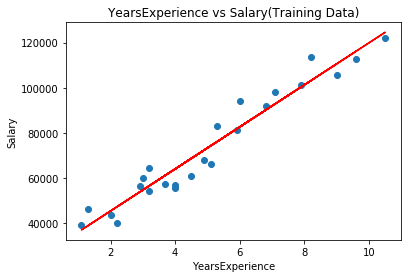

In [18]:
plt.scatter(x_train, y_train)
plt.plot(x_train, y_pred_train,'r')
plt.title('YearsExperience vs Salary(Training Data)')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

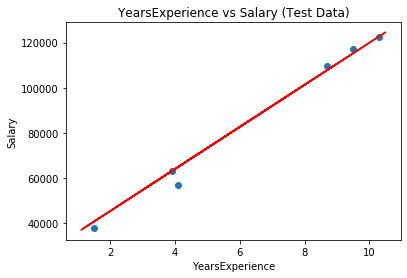

In [19]:
plt.scatter(x_test, y_test)
plt.plot(x_train, y_pred_train,'r')
plt.title('YearsExperience vs Salary (Test Data)')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

In [20]:
mse = metrics.mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
rmse

3580.979237321345